<a href="https://colab.research.google.com/github/sezhilarasi26/handwritten-digital-recoginition-al/blob/main/Phase_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Upload the Dataset
from google.colab import files
uploaded = files.upload()


Saving mnist_train.csv to mnist_train.csv


In [ ]:
# 2. Load the Dataset
import pandas as pd
import numpy as np

train_data = pd.read_csv('mnist_train.csv')  # Replace with your filename
train_data.head()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 3. Data Exploration
print("Shape of dataset:", train_data.shape)
print("Dataset info:")
print(train_data.info())
print("Statistical description:")
print(train_data.describe())


Shape of dataset: (60000, 785)
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB
None
Statistical description:
              label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  

In [ ]:
# 4. Check for Missing Values and Duplicates
print("Missing values:\n", train_data.isnull().sum())
print("Duplicates:", train_data.duplicated().sum())


Missing values:
 label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64
Duplicates: 0


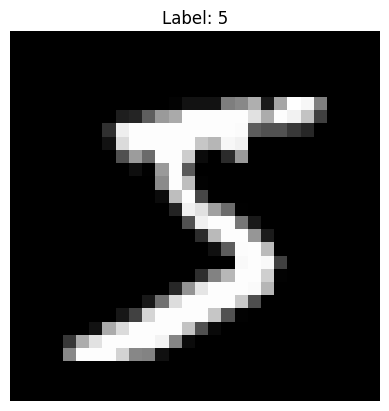

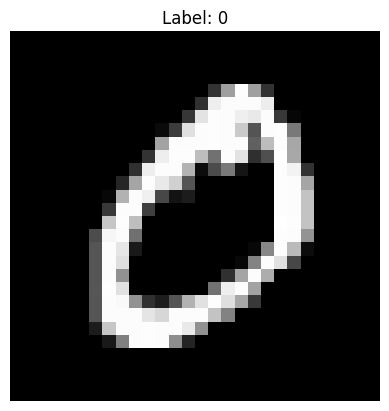

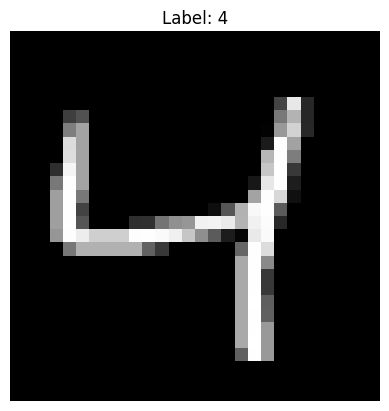

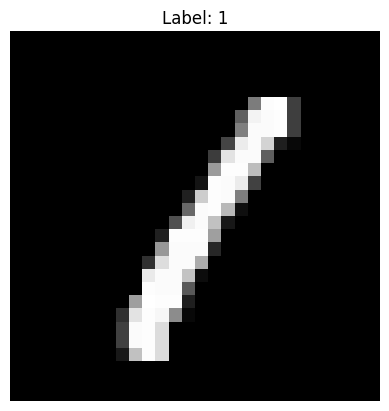

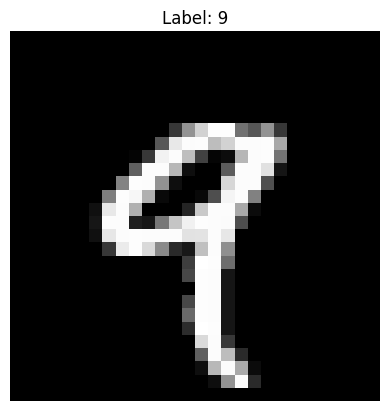

In [ ]:
# 5. Visualize a Few Features
import matplotlib.pyplot as plt

# Visualize first 5 digits
for i in range(5):
    img = train_data.iloc[i, 1:].values.reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {train_data.iloc[i, 0]}")
    plt.axis('off')
    plt.show()


In [ ]:
# 6. Identify Target and Features
X = train_data.drop('label', axis=1)
y = train_data['label']


In [ ]:
# 7. Convert Categorical Columns to Numerical (Not needed - labels are already numeric)
# Included for completeness
y = y.astype('int')


In [ ]:
# 8. One-Hot Encoding (for target variable)
from tensorflow.keras.utils import to_categorical
y_encoded = to_categorical(y)


In [ ]:
# 9. Feature Scaling
X_scaled = X / 255.0


In [ ]:
# 10. Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# 11. Model Building (Deep Learning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten

model = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 12. Evaluation (Training)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=128)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8421 - loss: 0.5272 - val_accuracy: 0.9651 - val_loss: 0.1218
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9623 - loss: 0.1218 - val_accuracy: 0.9723 - val_loss: 0.0902
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9743 - loss: 0.0818 - val_accuracy: 0.9750 - val_loss: 0.0774
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9805 - loss: 0.0640 - val_accuracy: 0.9759 - val_loss: 0.0794
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9844 - loss: 0.0470 - val_accuracy: 0.9803 - val_loss: 0.0676
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9877 - loss: 0.0404 - val_accuracy: 0.9812 - val_loss: 0.0686
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9896 - loss: 0.0329 - val_accuracy: 0.9796 - val_loss: 0.0689
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9908 - loss: 0.0272 - va

In [ ]:
# 13. Make Predictions from New Input
sample = X_val.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample)
predicted_digit = np.argmax(prediction)
print("Predicted digit:", predicted_digit)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted digit: 7


In [ ]:
# 14. Convert to DataFrame and Encode (for new input if needed)
# Example for one new sample
sample_df = pd.DataFrame(sample)
sample_scaled = sample_df / 255.0


In [ ]:
# 16. Deployment - Building an Interactive App
!pip install gradio
import gradio as gr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.3 MB/s eta 0:00:00


In [ ]:
# 17. Create a Prediction Function
def predict_digit(image):
    import cv2
    image = cv2.resize(image, (28, 28))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = image.reshape(1, -1).astype('float32') / 255.0
    pred = model.predict(image)
    return np.argmax(pred)


In [ ]:
# 18. Create the Gradio Interface
interface = gr.Interface(fn=predict_digit,
                         inputs="image",
                         outputs="label",
                         title="🎓Handwritten Digit Recognizer",
                         description="Upload an image of a digit (0-9) to predict it.")
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d3947a5ca3f7fd2233.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
